# This notebook has been adapted from 

Machine Learning for NLP - ENSAE 2022 - Lecture 2 illustration 

This notebook aims at illustrating the concepts introduced in the [lecture 2](https://nlp-ensae.github.io/files/2-ML-FOR-NLP-2022.pdf) of the Machine Learning for NLP course

Slides from https://nlp-ensae.github.io/files/2-ML-FOR-NLP-2022.pdf
(Skip to slide 17)


In [25]:
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm


# One Hot Representations

In [32]:
vocab  = {'potato', 'petrolium', 'carrots', 'garlic', 'mac', 'basil', 'piano', 'flour'}
vecs = np.zeros((len(vocab), len(vocab)))
vecs[[range(len(vocab))], [range(len(vocab))]] = 1

potato, petrolium, carrots, garlic, mac, basil, piano, flour = vecs


In [34]:
# What is the similarity between petrolium and potato?
# What about carrots and potato?

# Similarity between vectors 🤔

## Dot Product?

$$
\textbf{a} = [a_1, a_2, \dots , a_n]\\\textbf{b} = [b_1, b_2, \dots , b_n] \\ \textbf{a}.\textbf{b} = \sum^{n}_{i=1}a_ib_i
$$

- Vectors with a larger magnitude will have higher 'score'

## Cosine?

$$
\text{cos}(\textbf{a},\textbf{b}) = \frac{\textbf{a} . \textbf{b}}{||\textbf{a}|| . ||\textbf{b}||}
$$

In [45]:
from numpy import dot
from numpy.linalg import norm

def cosine(v1, v2):
  """
  cosine similarity of two vectors
  NB: Standard metric to measure similarity between word vectors
  
  Hint: look at the imports in cell above ;)
  """
  return dot(v1, v2)/(norm(v1)*norm(v2))

a,b = np.array([1,1,1,1]), np.array([-1,2,-1,2])
print(f"Cosine of {a}, {b} = {cosine(a,b)}")

a,b = np.array([1,1,1,1]), np.array([-2,-2,-2,-2])
print(f"Cosine of {a}, {b} = {cosine(a,b)}")

a,b = np.array([1,1,1,1]), np.array([20,20,20,20])
print(f"Cosine of {a}, {b} = {cosine(a,b)}")

a,b = np.array([1,1,1,1]), np.array([-9,20,-7,-4])
print(f"Cosine of {a}, {b} = {cosine(a,b)}")


Cosine of [1 1 1 1], [-1  2 -1  2] = 0.31622776601683794
Cosine of [1 1 1 1], [-2 -2 -2 -2] = -1.0
Cosine of [1 1 1 1], [20 20 20 20] = 1.0
Cosine of [1 1 1 1], [-9 20 -7 -4] = 0.0


# Count-Based Representations

Same dimensions as one-hot.


In [46]:

# Co-Occurences of dog, lion and car 
#  (leash,walk, run, owner, pet, barked, the)
dog =  [3,   5,   2,     5,   3,      2,  9]
lion = [0,   3,   2,     0,   1,      0,  5]
car =  [0,   0,   1,     3,   0,      0,  9]

# dog = np.array(dog)
# lion = np.array(lion)
# car =  np.array(car)

In [47]:

print(f'Example 1: Original similarities \nCosine Similarity dog vs. lion {cosine(dog, lion):.4f} ')
print(f'Cosine Similarity dog vs. car {cosine(dog, car):.4f} \n')

Example 1: Original similarities 
Cosine Similarity dog vs. lion 0.8562 
Cosine Similarity dog vs. car 0.8199 



In [92]:
# Now assume 'the dog' and 'the car' appear much more 
# (leash, walk, run, owner, pet, barked, the)
dog =  [3,   5,   2,     5,   3,      2,  9+25]
car =  [0,   0,   1,     3,   0,      0,  9+25]

print(f'Example 2: Now assume "the dog" and "the car" appear much more  \nCosine Similarity dog vs. lion {cosine(dog, lion):.4f}')
print(f'Cosine Similarity dog vs. car {cosine(dog, car):.4f} ')
print(f'What do you observe? \n')
# Frequent words impacts a lot the representations

Example 2: Now assume "the dog" and "the car" appear much more  
Cosine Similarity dog vs. lion 0.9106
Cosine Similarity dog vs. car 0.9787 
What do you observe? 



In [49]:
# Now assume 'the dog' and 'the car' appear much more 
# (leash,   walk, run, owner, pet, barked, the)
dog =  [3+1,   5,   2,     5,   3,      2,   9]
car =  [0+1,   0,   1,     3,   0,      0,   9]

print(f'Example 3: Now assume "dog leash" and "car leash" occur.  \nCosine Similarity dog vs. lion {cosine(dog, lion):.4f}')
print(f'Cosine Similarity dog vs. car {cosine(dog, car):.4f} ')
print(f'What do you observe? \n')
# Very high sensitivity to rare words

Example 3: Now assume "dog leash" and "car leash" occur.  
Cosine Similarity dog vs. lion 0.8378
Cosine Similarity dog vs. car 0.8304 
What do you observe? 



## Observations

- Count based similarity is super sensitive to less informational, very frequent word (the)
- Count based similarity is super sensitive to rare words as well (leash)

## Alternatives?

TF-IDF solves this problem. 

[Good Article explaining it](https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530) | 
[Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Q: **why not use tf-idf then?**

A: Its not a way to represent tokens, only a way to compute a score

# Pointwise Mutual Information

**Estimate association between events** (events = tokens, for us).
- `PMI("barack", "obama") =   20.0`: Does "Barack" often appear with "Obama" (yes → high positive value)? **they're correlated**
- `PMI("barack", "pizza") =    0.3`: Or does it appear together with "Peacock" (independent → close to zero)? **they're not correlated**
- `PMI("barack", "racist") = -13.8`: Or does it appear together with "racist"?
    - In fact no, it appears less frequently with "Barack". I.e., **they're inversely correlated**


> [PMI] is one of the most important concepts in NLP - Ch 6, Speech and Language Processing, Jurafsky and Martin


###### Let's work with this co-occurance matrix

![coccurance.png](./../resources/imgs/word-wordcooccurancematrix.png)


In [100]:
cooccurance = np.asarray([
    [3,  5,   2,   5,     3,   2 ,    8],
    [0,  3,   2,   0,     1,   0,     6],
    [0,  0,   1,   3,     0,   0,     3]
])

# (leash, walk, run, owner, pet, barked, the)
dog =  np.array([3,  5,   2,   5,     3,   2 ,    8])
lion = np.array([0,  3,   2,   0,     1,   0,     6])
car =  np.array([0,  0,   1,   3,     0,   0,     3])

leash =  np.array([3, 0, 0])
walk =   np.array([5, 3, 0])
run =    np.array([2, 2, 1])
owner =  np.array([5, 0, 3])
pet =    np.array([3, 1, 0])
barked = np.array([2, 0, 0])
the =    np.array([8, 6, 3])


## PMI Formula
    
$$\text{pmi}(x, y) = \text{ln} \big( \frac{p(x, y)}{p(x) p(y)}\big)$$

Its a simple co-relation metric.

In [147]:
def ppmi(mat, ix, iy):
    pxy = mat[ix, iy]/mat.sum()
    px = mat[ix].sum()/mat.sum()
    py = mat[:,iy].sum()/mat.sum()
    
    if pxy == 0 or px == 0 or py == 0:
        return 0
    
    return np.log(pxy/(px*py))

In [153]:
print(ppmi(cooccurance, 1, 0)) # dog, leash
print(ppmi(cooccurance, 0, 1)) # dog, walk
print(ppmi(cooccurance, 0, 2)) # dog, run

0
0.04793946228911926
-0.3983476403393003


![PMIVEC.jpg](./../resources/imgs/pmivec.png)

In [150]:
def pmivec(cooccurance, ix):
    return np.array([ppmi(cooccurance, ix, iy) for iy in range(cooccurance.shape[1])])

In [154]:
dog_pmi = pmivec(cooccurance, 0)
lion_pmi = pmivec(cooccurance, 1)
car_pmi = pmivec(cooccurance, 2)

print(dog_pmi)
print(lion_pmi)
print(car_pmi)

[ 0.51794309  0.04793946 -0.39834764  0.04793946  0.23026102  0.51794309
 -0.23582871]
[ 0.          0.3844117   0.44895022  0.         -0.02105341  0.
  0.32378708]
[0.         0.         0.29479954 0.9234082  0.         0.
 0.1696364 ]


# Problems with all of these methods?

## Dimensionality

![NwordsStuff.jpg](./../resources/imgs/nwords_per_doc.png)

x axis - number of documents, y axis - number of unique words

With more documents, come more words. Every token will be 33k dimensions!

# Prediction-Based Representation: Word2vec - Skip Gram

Dense vectors: every token exists in a n-dimensional space. 
- Different dimensions of the space encode different latent features

In [155]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            15G         12G        325M        696M        2,1G        1,4G
Swap:          979M        973M        6,6M


In [ ]:
# Lets manually read the vectors
vocab, vectors = {}, []
n_words = 20000
with Path('../resources/vectors/wikinews/wiki-news-300d-1M.vec').open('r') as f:
    for i, line in tqdm(enumerate(f.readlines())):
        if i > 0:
            vocab.setdefault(line.split()[0].strip(), len(vocab))
            vectors.append([float(x.strip()) for x in line.split()[1:]])
        if i > n_words:
            break
            
vectors = np.array(vectors)

In [195]:
class WordVectors:
    
    def __init__(self, vocab, vectors):
        self.vocab = vocab
        self.vectors = vectors if isinstance(vectors, np.ndarray) else np.array(vectors)
        self.zerovec = np.zeros((vectors.shape[1]), dtype=np.float)
        
        self._norm = norm(vectors, axis=1)
        self.id_to_tok = {i:tok for tok, i in vocab.items()}
        
    def __call__(self, k):
        try:
            ind = self.vocab[k]
            return self.vectors[ind]
        except KeyError:
            return self.zerovec
        
    def __len__(self):
        return len(self.vocab)
    
    def cosine(self, va, vb):
        if isinstance(va, str):
            va = self.vocab.get(va, -1)
        if isinstance(vb, str):
            vb = self.vocab.get(vb, -1)
    
    def mo(self, word, k: 10):
        wid = self.vocab.get(word, -1)
        if wid < 0:
            return None
        v = self.vectors[wid]
        cosines = np.dot(self.vectors, v) / self._norm / norm(v)
        cosines_ind = np.argsort(-cosines)[:k]
        return [(self.id_to_tok[tokid], cosines[tokid]) for tokid in cosines_ind]
        

w2v = WordVectors(vocab, np.array(vectors))
len(vectors), len(vocab), w2v.__len__()

(20001, 20001, 20001)

In [196]:
print(f"W2V Cosine of 'dog', and 'cat' is {cosine(w2v('dog'), w2v('cat')):.4f}")
print(f"W2V Cosine of 'dog', and 'fork' is {cosine(w2v('dog'), w2v('fork')):.4f}")
print('----')
print(f"W2V Cosine of 'pen', and 'man' is {cosine(w2v('pen'), w2v('man')):.4f}")
print(f"W2V Cosine of 'pen', and 'pencil' is {cosine(w2v('pen'), w2v('pencil')):.4f}")

W2V Cosine of 'dog', and 'cat' is 0.6873
W2V Cosine of 'dog', and 'fork' is 0.3744
----
W2V Cosine of 'pen', and 'man' is 0.3808
W2V Cosine of 'pen', and 'pencil' is 0.6949


In [199]:
# Similarity 
# 1- computing the cosine between the vector of 'dog' and all the other words
# 2- get the top-10 most similar words 
# model.wv.most_similar does those two steps 
w2v.mo('dog', 10)


[('dog', 1.0),
 ('dogs', 0.8560660878593637),
 ('Dog', 0.7767305489997491),
 ('pet', 0.7213230507552724),
 ('cat', 0.6873316551265685),
 ('Dogs', 0.6489565924493521),
 ('cats', 0.6471135950865075),
 ('pets', 0.6397632050791527),
 ('animal', 0.6018399572359109),
 ('horse', 0.6009150572826595)]

In [203]:
# Visualization
from sklearn.decomposition import PCA
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

def plot_word2vec_embedding(model, projection="pca", 
                            words=None, 
                            plot_dir=None,
                            sample=0):
        
    vecs = np.array([model(w) for w in words])

    if projection == "pca":
      pca_representations = PCA().fit_transform(vecs)[:,:2]
    else:
      raise(Exception(f"{projection} not supported"))
    
    plt.figure(figsize=(6,6))
    plt.scatter(pca_representations[:,0], pca_representations[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, pca_representations):
        plt.text(x+0.05, y+0.05, word)
    if plot_dir:
      plt.savefig(plot_dir)

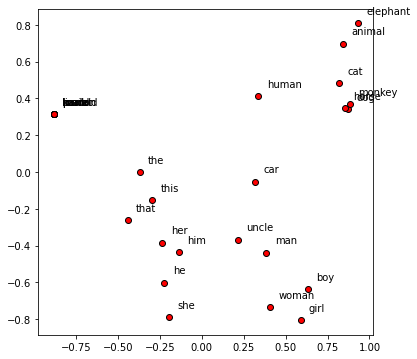

In [204]:
plot_word2vec_embedding(w2v, 
                        words = ['dog', 'cat', 'animal', 'elephant', 'car', 'human','horse', 'monkey', 'parrot', 'koala', 'lizard',
                         #  'eating', 'barking',
                         'man', 'woman',"girl","boy","uncle", 
                         "he", "she", "her", "him",
                         "the", "that","this",
                         'paris', 'madrid', 'london', "rome"],
                         plot_dir="./plot_2.png",
                         )

# Sources for in-depth reads

- Ch 6, Speech and Language Processing - https://web.stanford.edu/~jurafsky/slp3/6.pdf (great book; great chapter)
- Great article on understanding the intuition of PMI - https://svn.spraakdata.gu.se/repos/gerlof/pub/www/Docs/npmi-pfd.pdf